# Bokeh & Seaborn(Vaccinating)

Main Reference: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

用來做範例的這個資料是COVID疫情期間的各國疫苗接種資料。資料包含不同國家在不同日期所上傳的資料。要注意的是，這份資料的空值相當的多，有看得出來是空值的資料（如某些項目沒有填寫），也有沒有填寫的天數。每個國家開始登記的日期、漏登的日期、後來不再追蹤的日期都不一定，因此對齊資料的日期、決定資料可回答問題的區間都非常辛苦。

## Load vaccination data

* https://ourworldindata.org/covid-vaccinations
* https://github.com/owid/covid-19-data/tree/master/public/data
* https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv

In [ ]:
import pandas as pd
raw = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [24]:
raw

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233050,ZWE,Africa,Zimbabwe,2022-11-02,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
233051,ZWE,Africa,Zimbabwe,2022-11-03,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
233052,ZWE,Africa,Zimbabwe,2022-11-04,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
233053,ZWE,Africa,Zimbabwe,2022-11-05,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


### Observing data

In [26]:
raw.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

計算每個洲（continent）有多少資料。每個洲會高達數萬筆資料，原因是因為每一列是一個國家一天的資料。

In [27]:
print(set(raw.continent))
raw.continent.value_counts()

{nan, 'Oceania', 'Africa', 'South America', 'Asia', 'North America', 'Europe'}


Europe           53357
Africa           52948
Asia             49281
North America    35177
Oceania          16422
South America    12716
Name: continent, dtype: int64

### Filtering data

Since the purpose is to understand the similarities and differences between Taiwan's and other countries, the following only deals with Asian data, including South Korea, Japan and other countries that deal with the epidemic situation similar to my country's.

In [28]:
df_asia = raw.loc[raw['continent']=="Asia"]
set(df_asia.location)

{'Afghanistan',
 'Armenia',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Bhutan',
 'Brunei',
 'Cambodia',
 'China',
 'Georgia',
 'Hong Kong',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Israel',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kuwait',
 'Kyrgyzstan',
 'Laos',
 'Lebanon',
 'Macao',
 'Malaysia',
 'Maldives',
 'Mongolia',
 'Myanmar',
 'Nepal',
 'North Korea',
 'Northern Cyprus',
 'Oman',
 'Pakistan',
 'Palestine',
 'Philippines',
 'Qatar',
 'Saudi Arabia',
 'Singapore',
 'South Korea',
 'Sri Lanka',
 'Syria',
 'Taiwan',
 'Tajikistan',
 'Thailand',
 'Timor',
 'Turkey',
 'Turkmenistan',
 'United Arab Emirates',
 'Uzbekistan',
 'Vietnam',
 'Yemen'}

In [29]:
# Using .loc() to filter location == Taiwan
# df_tw = df_asia.loc[df_asia['location'] == "Taiwan"]

# Using pandas.Dataframe.query() function
df_tw = df_asia.query('location == "Taiwan"')
df_tw

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
203086,TWN,Asia,Taiwan,2020-01-16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,80.46,NaN,23893396.0,NaN,NaN,NaN,NaN
203087,TWN,Asia,Taiwan,2020-01-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,80.46,NaN,23893396.0,NaN,NaN,NaN,NaN
203088,TWN,Asia,Taiwan,2020-01-18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,80.46,NaN,23893396.0,NaN,NaN,NaN,NaN
203089,TWN,Asia,Taiwan,2020-01-19,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,80.46,NaN,23893396.0,NaN,NaN,NaN,NaN
203090,TWN,Asia,Taiwan,2020-01-20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,80.46,NaN,23893396.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204107,TWN,Asia,Taiwan,2022-11-02,7780125.0,33156.0,32034.429,12929.0,53.0,64.286,...,NaN,NaN,NaN,80.46,NaN,23893396.0,NaN,NaN,NaN,NaN
204108,TWN,Asia,Taiwan,2022-11-03,7810077.0,29952.0,31219.429,13010.0,81.0,63.857,...,NaN,NaN,NaN,80.46,NaN,23893396.0,NaN,NaN,NaN,NaN
204109,TWN,Asia,Taiwan,2022-11-04,7837658.0,27581.0,30222.143,13084.0,74.0,66.286,...,NaN,NaN,NaN,80.46,NaN,23893396.0,NaN,NaN,NaN,NaN
204110,TWN,Asia,Taiwan,2022-11-05,7863193.0,25535.0,29230.429,13151.0,67.0,65.000,...,NaN,NaN,NaN,80.46,NaN,23893396.0,NaN,NaN,NaN,NaN


In [30]:
df_tw.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

## Line plot of time series

由於要以時間（日期）當成X軸來繪圖，所以要先偵測看看目前的日期（`date`）變數型態為何（由於載下來的資料是CSV，八成是字串，偶而會是整數），所以會需要將日期的字串轉為Python的時間物件`datetime`。

In [33]:
print(type(df_tw.date))
# <class 'pandas.core.series.Series'>

print(df_tw.date.dtype)
# object (str)

# Converting columns to datetime
df_tw['date'] = pd.to_datetime(df_tw['date'], format="%Y-%m-%d")

print(df_tw.date.dtype)
# datetime64[ns]

<class 'pandas.core.series.Series'>
datetime64[ns]
datetime64[ns]


/var/folders/0p/7xy1_dzx0_s5rnf06c0b316w0000gn/T/ipykernel_38668/1951838620.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tw['date'] = pd.to_datetime(df_tw['date'], format="%Y-%m-%d")


In [34]:
df_tw

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
203086,TWN,Asia,Taiwan,2020-01-16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,80.46,NaN,23893396.0,NaN,NaN,NaN,NaN
203087,TWN,Asia,Taiwan,2020-01-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,80.46,NaN,23893396.0,NaN,NaN,NaN,NaN
203088,TWN,Asia,Taiwan,2020-01-18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,80.46,NaN,23893396.0,NaN,NaN,NaN,NaN
203089,TWN,Asia,Taiwan,2020-01-19,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,80.46,NaN,23893396.0,NaN,NaN,NaN,NaN
203090,TWN,Asia,Taiwan,2020-01-20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,80.46,NaN,23893396.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204107,TWN,Asia,Taiwan,2022-11-02,7780125.0,33156.0,32034.429,12929.0,53.0,64.286,...,NaN,NaN,NaN,80.46,NaN,23893396.0,NaN,NaN,NaN,NaN
204108,TWN,Asia,Taiwan,2022-11-03,7810077.0,29952.0,31219.429,13010.0,81.0,63.857,...,NaN,NaN,NaN,80.46,NaN,23893396.0,NaN,NaN,NaN,NaN
204109,TWN,Asia,Taiwan,2022-11-04,7837658.0,27581.0,30222.143,13084.0,74.0,66.286,...,NaN,NaN,NaN,80.46,NaN,23893396.0,NaN,NaN,NaN,NaN
204110,TWN,Asia,Taiwan,2022-11-05,7863193.0,25535.0,29230.429,13151.0,67.0,65.000,...,NaN,NaN,NaN,80.46,NaN,23893396.0,NaN,NaN,NaN,NaN


### Plot 1 line by Pandas

**args**
- `figsize=(10,5)`: The size in `figsize=(5,3)` is given in inches per (width, height). See https://stackoverflow.com/questions/51174691/how-to-increase-image-size-of-pandas-dataframe-plot

<AxesSubplot:xlabel='date'>

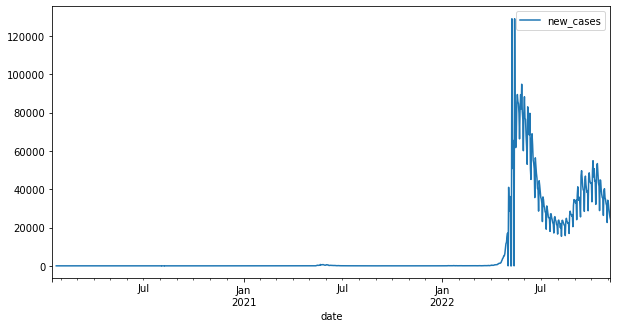

In [35]:
df_tw.plot(x="date", y="new_cases", figsize=(10, 5))

## Plot multiple lines

要繪製單一變項（一個國家）的折線圖很容易，X軸為日期、Y軸為案例數。但要如何繪製多個國家、多條折線圖（每個國家一條線）？以下就以日本和台灣兩國的數據為例來進行繪製。

`location`這個欄位紀錄了該列資料屬於日本或台灣。通常視覺化軟體會有兩種作法，一種做法是必須把日本和台灣在欄的方向展開（用`df.pivot()`），變成兩個變項，日本和台灣各一個變項，Python最基本的繪圖函式庫matplotlib就必須這麼做。但如果用號稱是matplotlib的進階版seaborn，則可以指定`location`這個變項作為群組資訊，簡單地說是用`location`當成群組變數來繪製不同的線。

In [38]:
df1 = df_asia.loc[df_asia['location'].isin(["Taiwan", "Japan"])]
df1['date'] = pd.to_datetime(df1['date'], format="%Y-%m-%d")
set(df1.location)

/var/folders/0p/7xy1_dzx0_s5rnf06c0b316w0000gn/T/ipykernel_38668/2904734101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date'] = pd.to_datetime(df1['date'], format="%Y-%m-%d")


{'Japan', 'Taiwan'}

In [39]:
df1[['location', 'date', 'new_cases']]

,location,date,new_cases
104856,Japan,2020-01-22,NaN
104857,Japan,2020-01-23,0.0
104858,Japan,2020-01-24,0.0
104859,Japan,2020-01-25,0.0
104860,Japan,2020-01-26,2.0
...,...,...,...
204107,Taiwan,2022-11-02,33156.0
204108,Taiwan,2022-11-03,29952.0
204109,Taiwan,2022-11-04,27581.0
204110,Taiwan,2022-11-05,25535.0


<AxesSubplot:xlabel='date'>

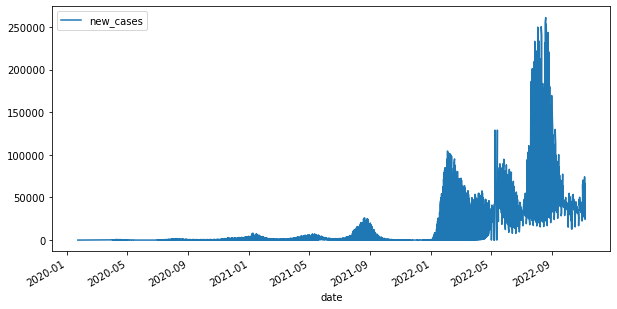

In [51]:
# df1 data contains more than 1 location

df1.plot(x="date", y="new_cases", figsize=(10, 5))

In [57]:
df_wide = df1.pivot(index="date", columns="location", 
                    values=["new_cases", "total_cases", "total_vaccinations_per_hundred"])
df_wide

new_cases          total_cases             \
location       Japan   Taiwan       Japan     Taiwan   
date                                                   
2020-01-16       NaN      NaN         NaN        NaN   
2020-01-17       NaN      NaN         NaN        NaN   
2020-01-18       NaN      NaN         NaN        NaN   
2020-01-19       NaN      NaN         NaN        NaN   
2020-01-20       NaN      NaN         NaN        NaN   
...              ...      ...         ...        ...   
2022-11-02   70396.0  33156.0  22460268.0  7780125.0   
2022-11-03   67473.0  29952.0  22527741.0  7810077.0   
2022-11-04   34064.0  27581.0  22561805.0  7837658.0   
2022-11-05   74170.0  25535.0  22635975.0  7863193.0   
2022-11-06   66397.0  24345.0  22702372.0  7887538.0   

           total_vaccinations_per_hundred          
location                            Japan  Taiwan  
date                                               
2020-01-16                            NaN     NaN  
2020-01-17                            NaN     NaN  
2020-01-18                            NaN     NaN  
2020-01-19                            NaN     NaN  
2020-01-20                            NaN     NaN  
...                                   ...     ...  
2022-11-02                         268.25  264.69  
2022-11-03                         268.34  264.83  
2022-11-04                         268.56  265.00  
2022-11-05                         268.81     NaN  
2022-11-06                         268.90  265.15  

[1026 rows x 6 columns]

#### `fillna()`

In [58]:
df_wide.fillna(0, inplace=True)
df_wide.new_cases.Taiwan
df_wide

new_cases          total_cases             \
location       Japan   Taiwan       Japan     Taiwan   
date                                                   
2020-01-16       0.0      0.0         0.0        0.0   
2020-01-17       0.0      0.0         0.0        0.0   
2020-01-18       0.0      0.0         0.0        0.0   
2020-01-19       0.0      0.0         0.0        0.0   
2020-01-20       0.0      0.0         0.0        0.0   
...              ...      ...         ...        ...   
2022-11-02   70396.0  33156.0  22460268.0  7780125.0   
2022-11-03   67473.0  29952.0  22527741.0  7810077.0   
2022-11-04   34064.0  27581.0  22561805.0  7837658.0   
2022-11-05   74170.0  25535.0  22635975.0  7863193.0   
2022-11-06   66397.0  24345.0  22702372.0  7887538.0   

           total_vaccinations_per_hundred          
location                            Japan  Taiwan  
date                                               
2020-01-16                           0.00    0.00  
2020-01-17                           0.00    0.00  
2020-01-18                           0.00    0.00  
2020-01-19                           0.00    0.00  
2020-01-20                           0.00    0.00  
...                                   ...     ...  
2022-11-02                         268.25  264.69  
2022-11-03                         268.34  264.83  
2022-11-04                         268.56  265.00  
2022-11-05                         268.81    0.00  
2022-11-06                         268.90  265.15  

[1026 rows x 6 columns]

#### `reset_index()`
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html

在經過pivot後，列方向會變成以`date`為index，此時我希望將`data`恢復為欄方向的變數，就需要用`reset_index()`。

In [59]:
df_wide.reset_index(inplace=True)
df_wide

date new_cases          total_cases             \
location                Japan   Taiwan       Japan     Taiwan   
0        2020-01-16       0.0      0.0         0.0        0.0   
1        2020-01-17       0.0      0.0         0.0        0.0   
2        2020-01-18       0.0      0.0         0.0        0.0   
3        2020-01-19       0.0      0.0         0.0        0.0   
4        2020-01-20       0.0      0.0         0.0        0.0   
...             ...       ...      ...         ...        ...   
1021     2022-11-02   70396.0  33156.0  22460268.0  7780125.0   
1022     2022-11-03   67473.0  29952.0  22527741.0  7810077.0   
1023     2022-11-04   34064.0  27581.0  22561805.0  7837658.0   
1024     2022-11-05   74170.0  25535.0  22635975.0  7863193.0   
1025     2022-11-06   66397.0  24345.0  22702372.0  7887538.0   

         total_vaccinations_per_hundred          
location                          Japan  Taiwan  
0                                  0.00    0.00  
1                                  0.00    0.00  
2                                  0.00    0.00  
3                                  0.00    0.00  
4                                  0.00    0.00  
...                                 ...     ...  
1021                             268.25  264.69  
1022                             268.34  264.83  
1023                             268.56  265.00  
1024                             268.81    0.00  
1025                             268.90  265.15  

[1026 rows x 7 columns]

### Visualized by matplotlib with pandas

後面加上`figsize`參數可以調整長寬比。
`pandas.DataFrame.plot`的可用參數可見https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html。

<AxesSubplot:xlabel='date'>

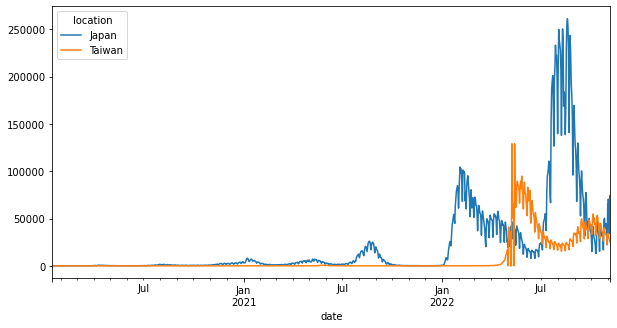

In [60]:
df_wide.plot(x="date", y="new_cases", figsize=(10, 5))

#### More params

例如對Y軸取log。
`pandas.DataFrame.plot`的可用參數可見https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html。

<AxesSubplot:xlabel='date'>

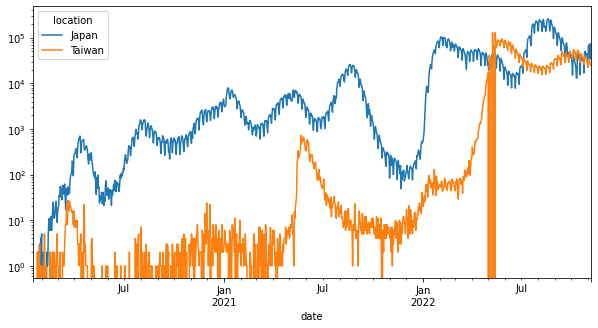

In [61]:
df_wide.plot(x="date", y="new_cases", figsize=(10, 5), logy=True)

### Visualized by seaborn

seaborn可以將`location`作為群組變數，不同組的就繪製在不同的線。

以下先將`location`、`date`、`new_cases`取出後，把NA值填0。

In [62]:
df1 = df_asia.loc[df_asia['location'].isin(["Taiwan", "Japan", "South Korea"])]
df1['date'] = pd.to_datetime(df1['date'], format="%Y-%m-%d")
df_sns = df1[["location", 'date', 'new_cases']].fillna(0)
df_sns

/var/folders/0p/7xy1_dzx0_s5rnf06c0b316w0000gn/T/ipykernel_38668/2059310855.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date'] = pd.to_datetime(df1['date'], format="%Y-%m-%d")


,location,date,new_cases
104856,Japan,2020-01-22,0.0
104857,Japan,2020-01-23,0.0
104858,Japan,2020-01-24,0.0
104859,Japan,2020-01-25,0.0
104860,Japan,2020-01-26,2.0
...,...,...,...
204107,Taiwan,2022-11-02,33156.0
204108,Taiwan,2022-11-03,29952.0
204109,Taiwan,2022-11-04,27581.0
204110,Taiwan,2022-11-05,25535.0


Seaborn繪圖還是基於matplotlib套件，但他的`lineplot()`可以多給一個參數`hue`，並將`location`指定給該參數，這樣繪圖時便會依照不同的`location`進行繪圖。

<AxesSubplot:xlabel='date', ylabel='new_cases'>

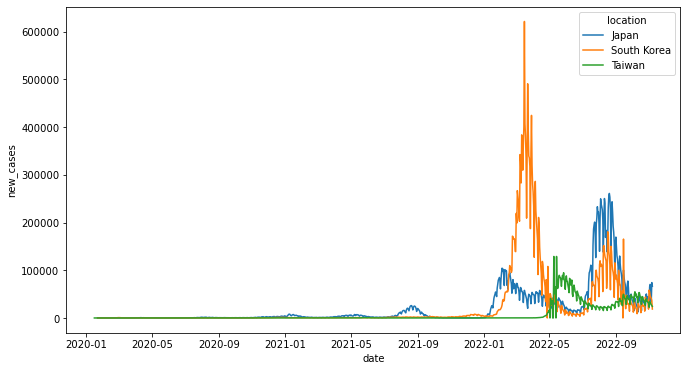

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(11, 6))
sns.lineplot(data=df_sns, x='date', y='new_cases', hue='location', ax=ax)

### Visualized by bokeh: `plot_bokeh()`
- https://towardsdatascience.com/beautiful-and-easy-plotting-in-python-pandas-bokeh-afa92d792167
- https://patrikhlobil.github.io/Pandas-Bokeh/ (Document of Pandas-Bokeh)

Bokeh的功能則是可以提供可互動的視覺化。但他不吃Pandas的MultiIndex，所以要將Pandas的階層欄位扁平化。以下是其中一種做法。做完扁平化就可以使用bokeh的函數來進行繪圖。

In [64]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

In [65]:
# !pip install pandas_bokeh
import pandas_bokeh
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [66]:
df_wide2 = df_wide.copy()
df_wide2.columns = df_wide.columns.map('_'.join)
df_wide2

,date_,new_cases_Japan,new_cases_Taiwan,total_cases_Japan,total_cases_Taiwan,total_vaccinations_per_hundred_Japan,total_vaccinations_per_hundred_Taiwan
0,2020-01-16,0.0,0.0,0.0,0.0,0.00,0.00
1,2020-01-17,0.0,0.0,0.0,0.0,0.00,0.00
2,2020-01-18,0.0,0.0,0.0,0.0,0.00,0.00
3,2020-01-19,0.0,0.0,0.0,0.0,0.00,0.00
4,2020-01-20,0.0,0.0,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...
1021,2022-11-02,70396.0,33156.0,22460268.0,7780125.0,268.25,264.69
1022,2022-11-03,67473.0,29952.0,22527741.0,7810077.0,268.34,264.83
1023,2022-11-04,34064.0,27581.0,22561805.0,7837658.0,268.56,265.00
1024,2022-11-05,74170.0,25535.0,22635975.0,7863193.0,268.81,0.00


In [67]:
df_wide2.plot_bokeh(
    kind='line',
    x='date_',
    y=['new_cases_Japan', 'new_cases_Taiwan']
)

Figure(id='1003', ...)

## Bar chart: vaccinating rate

In [68]:
df_asia.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [69]:
df_asia['date'] = pd.to_datetime(df_asia.date)
print(df_asia.date.dtype)

datetime64[ns]


/var/folders/0p/7xy1_dzx0_s5rnf06c0b316w0000gn/T/ipykernel_38668/1918172663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asia['date'] = pd.to_datetime(df_asia.date)


In [70]:
max(df_asia.date)

Timestamp('2022-11-07 00:00:00')

In [75]:
import datetime
df_recent = df_asia.loc[df_asia['date'] == datetime.datetime(2021, 10, 28)]

### by pure pandas

<AxesSubplot:ylabel='location'>

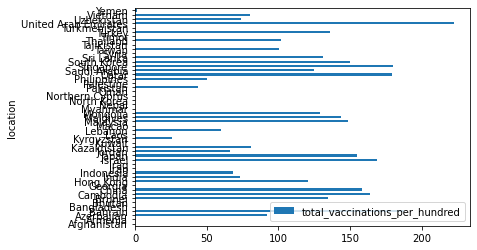

In [78]:
# df_recent.columns
df_recent.plot.barh(x="location", y="total_vaccinations_per_hundred")

<AxesSubplot:ylabel='location'>

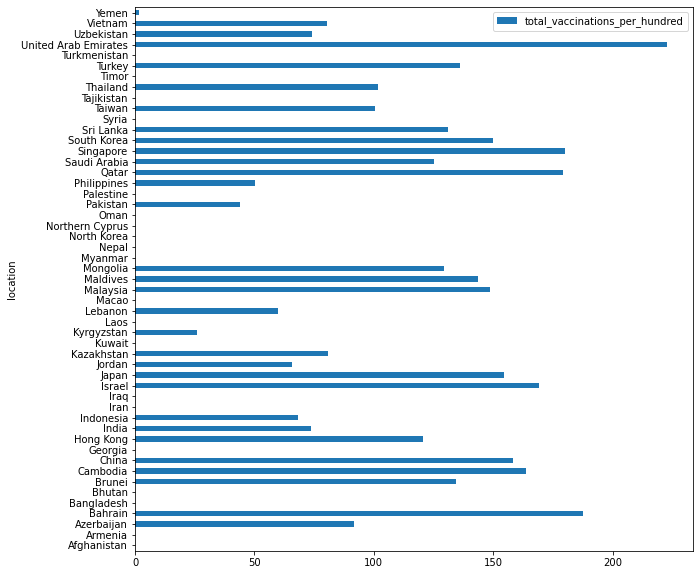

In [79]:
df_recent.plot.barh(x="location", y="total_vaccinations_per_hundred", figsize=(10, 10))

<AxesSubplot:ylabel='location'>

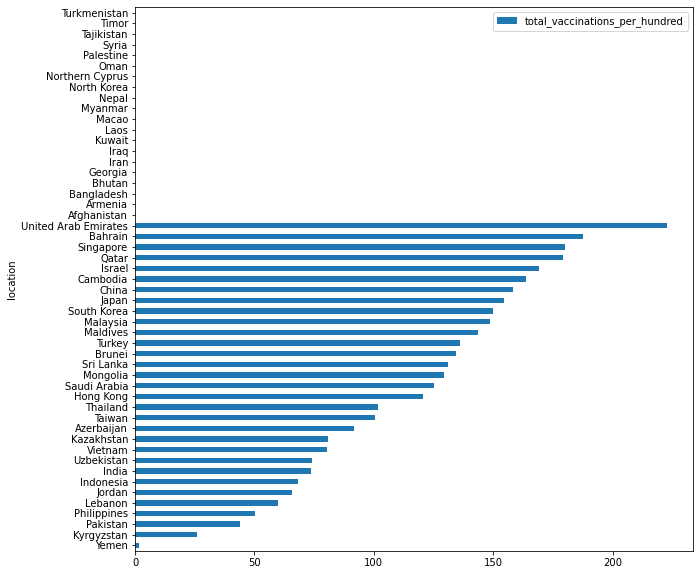

In [81]:
df_recent.sort_values('total_vaccinations_per_hundred', ascending=True).plot.barh(x="location", y="total_vaccinations_per_hundred", figsize=(10, 10))

<AxesSubplot:ylabel='location'>

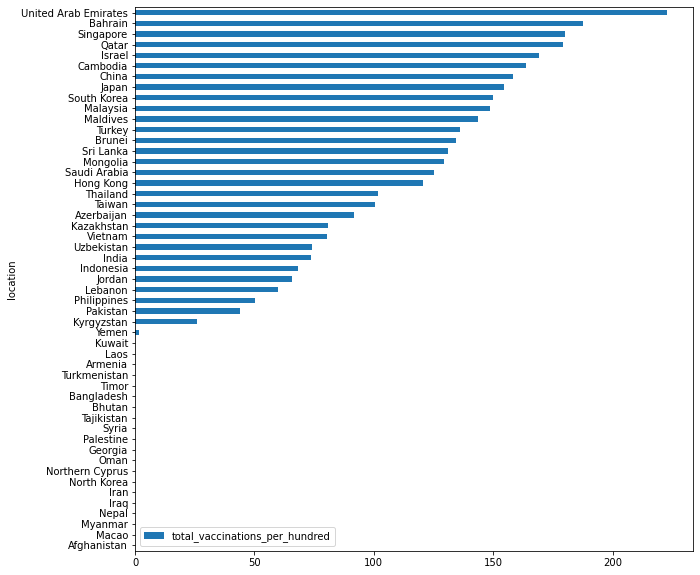

In [82]:
df_recent.fillna(0).sort_values('total_vaccinations_per_hundred', ascending=True).plot.barh(x="location", y="total_vaccinations_per_hundred", figsize=(10, 10))

### by plot_bokeh

In [83]:
toplot = df_recent.fillna(0).sort_values('total_vaccinations_per_hundred', ascending=True)
toplot.plot_bokeh(kind="barh", x="location", y="total_vaccinations_per_hundred")

Figure(id='1282', ...)

## Bokeh Settings

#### Displaying output in jupyter notebook

In [84]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

#### Adjust figure size along with windows size

In [85]:
plot_df = pd.DataFrame({"x":[1, 2, 3, 4, 5],
                        "y":[1, 2, 3, 4, 5],
                        "freq":[10, 20, 13, 40, 35],
                        "label":["10", "20", "13", "40", "35"]})
plot_df

,x,y,freq,label
0,1,1,10,10
1,2,2,20,20
2,3,3,13,13
3,4,4,40,40
4,5,5,35,35


In [86]:
p = figure(title = "TEST")
p.circle(plot_df["x"], plot_df["y"], fill_alpha=0.2, size=plot_df["freq"])
p.sizing_mode = 'scale_width'
show(p)

### Color mapper

#### Categorical color transforming Manually

In [ ]:
# from bokeh.palettes import Magma, Inferno, Plasma, Viridis, Cividis, d3

# cluster_label = list(Counter(df2plot.cluster).keys())
# color_mapper = CategoricalColorMapper(palette=d3['Category20'][len(cluster_label)], factors=cluster_label)
# p = figure(title = "doc clustering")
# p.sizing_mode = 'scale_width'
# p.circle(x = "x", y = "y", 
#          color={'field': 'cluster', 'transform': color_mapper},
#          source = df2plot, 
#          fill_alpha=0.5, size=5, line_color=None)
# show(p)

#### Continuous color transforming

In [89]:
from bokeh.palettes import Magma, Inferno, Plasma, Viridis, Cividis, d3
from bokeh.models import LogColorMapper, LinearColorMapper, LabelSet, ColumnDataSource 


p = figure(title = "ColorMapper Tester")
color_mapper = LinearColorMapper(palette="Plasma256", 
                                 low = min(plot_df["freq"]), 
                                 high = max(plot_df["freq"]))

source = ColumnDataSource(plot_df)
p.circle("x", "y", fill_alpha = 0.5, 
         size = "freq", 
         line_color=None,
         source = source,
         fill_color = {'field': 'freq', 'transform': color_mapper}
        )

p.sizing_mode = 'scale_width'

show(p)